**Name: Sumit Kalamkar | Roll no:27 | PRN: 22SC114501083 | Div:B**

# Ex 3: Transparency in AI Decision-Making

### Objective:
To compare transparent vs. black-box models.

To compare a transparent model (**Decision Tree**) and a black-box model (**Random Forest**) and understand how transparency in AI decision-making affects trust, interpretability, and ethical implications.


In [1]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:

df = sns.load_dataset("titanic")


df = df.dropna(subset=["age", "embarked", "fare", "sex"])


df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["embarked"] = df["embarked"].map({"S": 0, "C": 1, "Q": 2})

X = df[["pclass", "sex", "age", "fare", "embarked"]]
y = df["survived"]


In [8]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,1,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,0,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,0,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,0,Third,man,True,NaN,Southampton,no,True


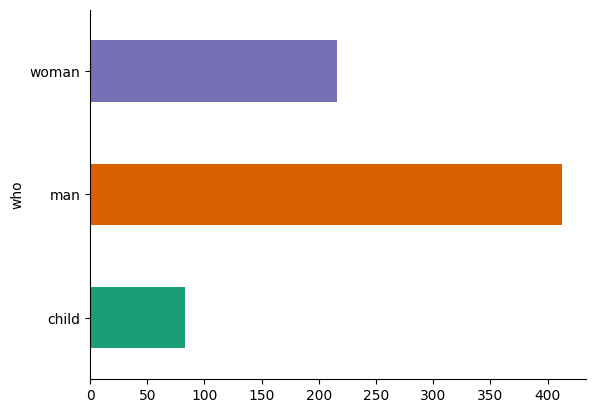

In [19]:
# @title who

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('who').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

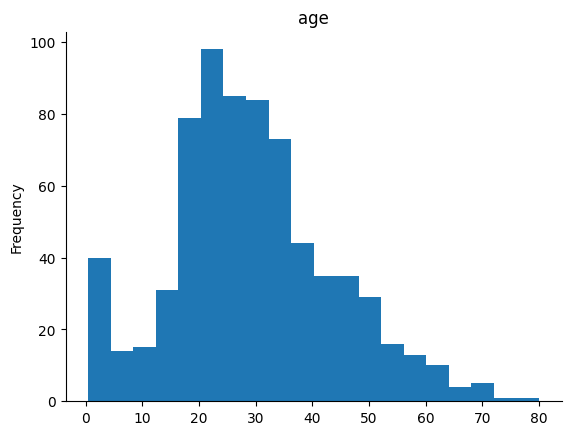

In [18]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

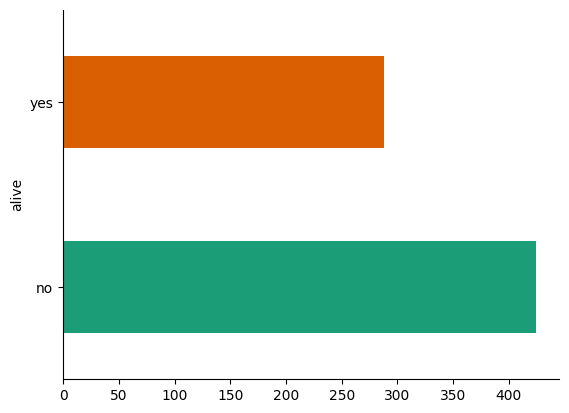

In [15]:


from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('alive').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
sum(df['alive']=='yes')

288

In [11]:
sum(df['alive']=='no')

424

In [14]:
df.shape

(712, 15)

In [3]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [4]:

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)


In [5]:

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)


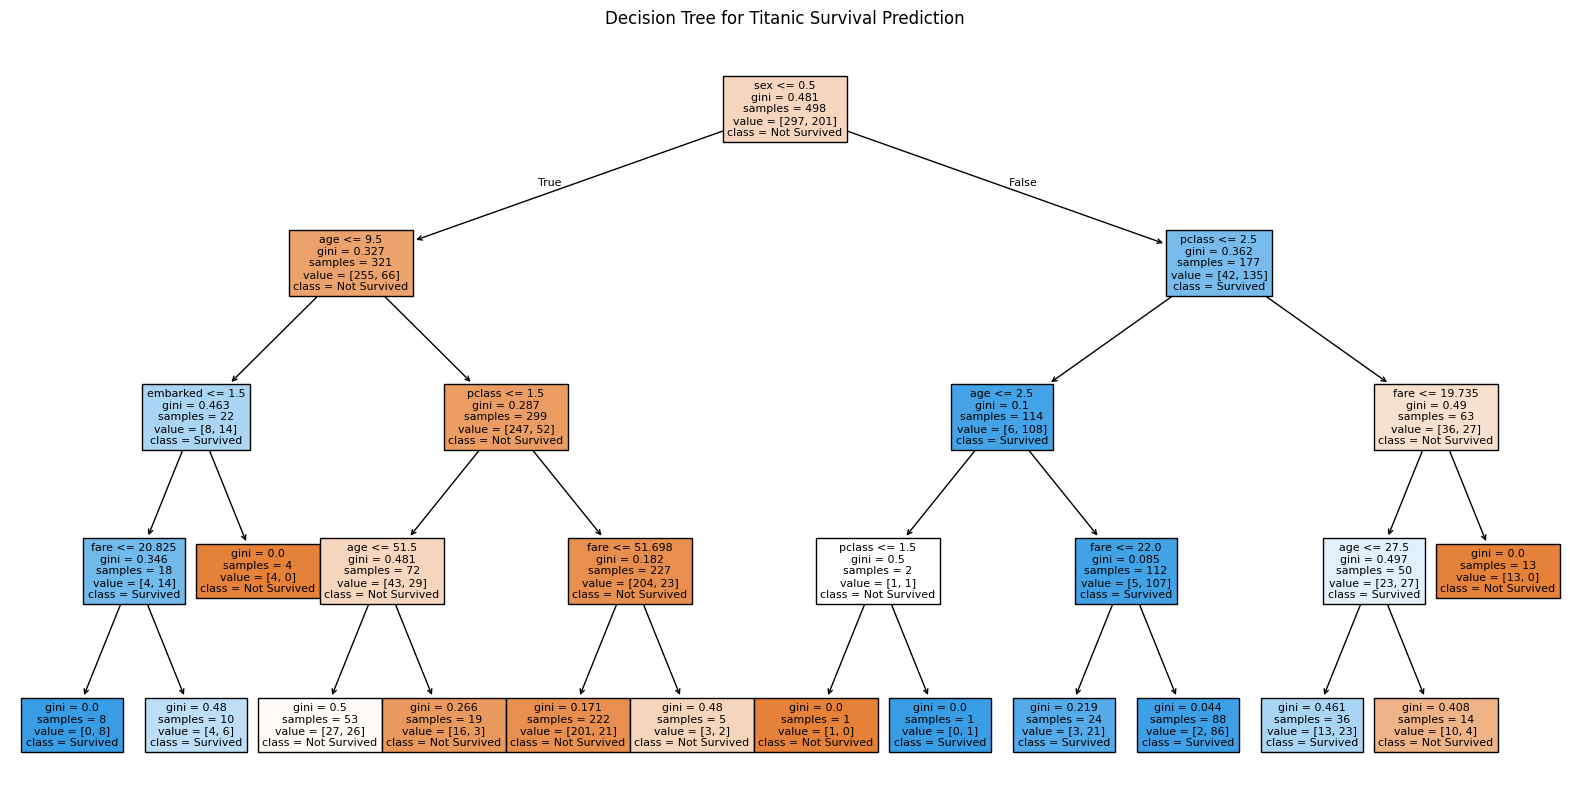

In [6]:

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.title("Decision Tree for Titanic Survival Prediction")
plt.show()


In [7]:

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       127
           1       0.78      0.67      0.72        87

    accuracy                           0.79       214
   macro avg       0.79      0.77      0.78       214
weighted avg       0.79      0.79      0.79       214

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       127
           1       0.72      0.62      0.67        87

    accuracy                           0.75       214
   macro avg       0.74      0.73      0.73       214
weighted avg       0.75      0.75      0.74       214



Objective:
To compare a transparent model (Decision Tree) and a black-box model (Random Forest) and assess how transparency impacts trust, interpretability, and ethical considerations in AI decision-making.

Dataset:
Titanic Survival Dataset

Target: Survived (0 = No, 1 = Yes)

Features: pclass, sex, age, fare, embarked

Sample Size (Test): 214 passengers



| Metric        | Decision Tree | Random Forest |
| ------------- | ------------- | ------------- |
| Accuracy      | **0.79**      | 0.75          |
| Precision (0) | 0.79          | 0.76          |
| Recall (0)    | **0.87**      | 0.83          |
| F1-score (0)  | **0.83**      | 0.80          |
| Precision (1) | **0.78**      | 0.72          |
| Recall (1)    | **0.67**      | 0.62          |
| F1-score (1)  | **0.72**      | 0.67          |


**Interpretation:**
**✅ Decision Tree (Transparent Model):**

1. Better overall accuracy (79%) compared to Random Forest (75%).

2. Higher recall and F1-score for both classes, especially class 1 (survived).

3. Fully interpretable: We can visualize and explain its decisions clearly.

4. Best when transparency and explainability are important (e.g., healthcare, legal decisions).

**⚫ Random Forest (Black-box Model):**

1. Lower accuracy (75%) and slightly worse performance across all metrics.

2. Harder to interpret due to ensemble complexity (100 trees).

3. May still be useful in real-world use cases when raw accuracy is more important than explainability.


| Aspect            | Decision Tree                     | Random Forest              |
| ----------------- | --------------------------------- | -------------------------- |
| **Transparency**  | ✅ High – Easy to interpret        | ❌ Low – Hard to explain    |
| **Trust**         | ✅ Users may trust the system more | ❌ Users may feel unsure    |
| **Fairness Risk** | ✅ Easier to audit for bias        | ❌ Difficult to detect bias |
| **Performance**   | ✅ Comparable in this case         | ⚠️ Slightly lower here     |
